# Preprocessing

In [2]:
import pandas as pd
from sklearn.preprocessing import RobustScaler

%reload_ext autoreload
%autoreload 2

from utils import plot_bar, calculate_plot_bar

In [2]:
data = pd.read_csv('../data/preprocessed/dataset_selected.csv')

In [34]:
data.head()

,shots,shots_against,goals_against,saves,score,shooting_percentage,bpm,amount_collected_big,amount_stolen_big,amount_collected_small,...,percent_offensive_third,percent_neutral_third,percent_infront_ball,percent_most_back,percent_most_forward,percent_closest_to_ball,percent_farthest_from_ball,inflicted,taken,tier
0,0,5,4,0,10,0.0,154,400,100,330,...,12.075999,28.488169,46.644520,26.383057,36.577200,29.639097,35.086117,0,0,2
1,1,1,0,0,186,100.0,126,551,100,325,...,36.107468,35.687850,26.218090,44.915104,46.223600,40.441845,51.488040,1,0,2
2,0,1,0,0,8,0.0,352,858,120,133,...,26.887451,21.217016,31.033924,42.134968,35.761204,19.461880,54.055370,0,0,2
3,0,15,8,0,154,0.0,265,562,196,301,...,23.337696,34.052437,37.773370,19.431648,40.459793,38.908910,27.049220,1,0,3
4,1,15,8,1,112,0.0,235,1110,181,515,...,14.724202,26.321451,33.011460,67.642975,55.393745,55.883717,64.675940,2,0,3


In [15]:
data.describe()

,shots,shots_against,goals_against,saves,score,shooting_percentage,bpm,amount_collected_big,amount_stolen_big,amount_collected_small,...,percent_offensive_third,percent_neutral_third,percent_infront_ball,percent_most_back,percent_most_forward,percent_closest_to_ball,percent_farthest_from_ball,inflicted,taken,tier
count,404951.000000,404951.000000,404951.000000,404951.000000,404951.000000,404951.000000,404951.000000,404951.000000,404951.000000,404951.000000,...,404951.000000,404951.000000,404951.000000,404951.000000,404951.000000,404951.000000,404951.000000,404951.000000,404951.000000,404951.000000
mean,2.090967,6.300093,2.322078,0.956138,295.091181,31.676114,318.119289,1252.352934,220.651269,512.735847,...,20.335323,29.814609,28.210611,34.711652,33.738777,33.705974,34.698521,0.632669,0.626666,14.749960
std,1.579105,3.109130,1.618102,1.064952,155.829024,38.585542,84.346060,528.922132,172.186030,198.128515,...,6.163095,4.665470,6.083261,7.945853,6.709148,6.054861,7.256317,0.968222,0.879370,4.551041
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.221877,0.072354,0.217817,0.291715,0.000000,0.000000,1.000000
25%,1.000000,4.000000,1.000000,0.000000,182.000000,0.000000,260.000000,886.000000,98.000000,383.000000,...,16.298605,26.976264,24.289200,29.570912,29.432397,29.950629,30.057923,0.000000,0.000000,11.000000
50%,2.000000,6.000000,2.000000,1.000000,278.000000,20.000000,325.000000,1254.000000,193.000000,502.000000,...,20.142790,29.902534,28.047293,34.257595,33.475227,33.466953,34.267536,0.000000,0.000000,15.000000
75%,3.000000,8.000000,3.000000,2.000000,389.000000,50.000000,379.000000,1595.000000,315.000000,628.000000,...,24.163904,32.814936,31.953294,39.251503,37.717817,37.139702,38.763768,1.000000,1.000000,19.000000
max,18.000000,39.000000,33.000000,11.000000,2129.000000,500.000000,816.000000,6521.000000,1907.000000,3276.000000,...,84.804730,82.140510,100.000000,114.739630,151.785720,126.785710,117.857150,43.000000,29.000000,22.000000


In [20]:
X_features = list(set(data.columns) - {'tier'})
distances = ['avg_distance_to_ball_possession', 'avg_distance_to_ball_no_possession', 'avg_distance_to_mates']
percents = ['percent_boost_speed', 'percent_supersonic_speed', 'percent_low_air', 'percent_high_air',
            'percent_boost_0_25', 'percent_boost_25_50', 'percent_boost_50_75', 'percent_full_boost', 'percent_zero_boost',
            'percent_farthest_from_ball', 'percent_closest_to_ball', 'percent_most_forward', 'percent_most_back', 'percent_infront_ball',
            'percent_neutral_third', 'percent_offensive_third']
overfill = ['amount_overfill', 'amount_overfill_stolen', 'amount_stolen_small', 'amount_stolen_big']
remaining = list(set(X_features) - set(distances) - set(percents) - set(overfill))
print(remaining)

['time_boost_speed', 'shots_against', 'bpm', 'time_infront_ball', 'taken', 'amount_collected_big', 'shooting_percentage', 'count_powerslide', 'time_closest_to_ball', 'shots', 'time_neutral_third', 'amount_collected_small', 'saves', 'amount_used_while_supersonic', 'score', 'goals_against', 'inflicted', 'avg_powerslide_duration']


In [31]:
data_preprocessed = data.copy()

data_preprocessed[percents] /= 100

def group_trasform(dataset, group):
    concat_data = pd.concat([col for label, col in dataset[group].iteritems()]).values.reshape(-1, 1)
    scaler = RobustScaler()
    scaler.fit(concat_data)
    for feature in group:
        dataset[feature] = scaler.transform(dataset[feature].values.reshape(-1, 1))

group_trasform(data_preprocessed, distances)
group_trasform(data_preprocessed, overfill)

data_preprocessed[remaining] = RobustScaler().fit_transform(data_preprocessed[remaining])
data_preprocessed.describe()

,shots,shots_against,goals_against,saves,score,shooting_percentage,bpm,amount_collected_big,amount_stolen_big,amount_collected_small,...,percent_offensive_third,percent_neutral_third,percent_infront_ball,percent_most_back,percent_most_forward,percent_closest_to_ball,percent_farthest_from_ball,inflicted,taken,tier
count,404951.000000,404951.000000,404951.000000,404951.000000,404951.000000,404951.000000,404951.000000,404951.000000,404951.000000,404951.000000,...,404951.000000,404951.000000,404951.000000,404951.000000,404951.000000,404951.000000,404951.000000,404951.000000,404951.000000,404951.000000
mean,0.045483,0.075023,0.161039,-0.021931,0.082566,0.233522,-0.057821,-0.002323,0.410574,0.043820,...,0.203353,0.298146,0.282106,0.347117,0.337388,0.337060,0.346985,0.632669,0.626666,14.749960
std,0.789552,0.777282,0.809051,0.532476,0.752797,0.771711,0.708790,0.746011,0.887557,0.808688,...,0.061631,0.046655,0.060833,0.079459,0.067091,0.060549,0.072563,0.968222,0.879370,4.551041
min,-1.000000,-1.500000,-1.000000,-0.500000,-1.342995,-0.400000,-2.731092,-1.768688,-0.726804,-2.048980,...,0.000000,0.000000,0.000000,0.002219,0.000724,0.002178,0.002917,0.000000,0.000000,1.000000
25%,-0.500000,-0.500000,-0.500000,-0.500000,-0.463768,-0.400000,-0.546218,-0.519041,-0.221649,-0.485714,...,0.162986,0.269763,0.242892,0.295709,0.294324,0.299506,0.300579,0.000000,0.000000,11.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.268041,0.000000,...,0.201428,0.299025,0.280473,0.342576,0.334752,0.334670,0.342675,0.000000,0.000000,15.000000
75%,0.500000,0.500000,0.500000,0.500000,0.536232,0.600000,0.453782,0.480959,0.896907,0.514286,...,0.241639,0.328149,0.319533,0.392515,0.377178,0.371397,0.387638,1.000000,1.000000,19.000000
max,8.000000,8.250000,15.500000,5.000000,8.942029,9.600000,4.126050,7.428773,9.103093,11.322449,...,0.848047,0.821405,1.000000,1.147396,1.517857,1.267857,1.178572,43.000000,29.000000,22.000000


In [32]:
data_preprocessed.to_csv('../data/preprocessed/dataset_preprocessed.csv', index=None)

## Merging Classes

In [4]:
data_preprocessed = pd.read_csv('../data/preprocessed/dataset_preprocessed.csv')

In [5]:
data.head()

,shots,shots_against,goals_against,saves,score,shooting_percentage,bpm,amount_collected_big,amount_stolen_big,amount_collected_small,...,percent_offensive_third,percent_neutral_third,percent_infront_ball,percent_most_back,percent_most_forward,percent_closest_to_ball,percent_farthest_from_ball,inflicted,taken,tier
0,0,5,4,0,10,0.0,154,400,100,330,...,12.075999,28.488169,46.644520,26.383057,36.577200,29.639097,35.086117,0,0,2
1,1,1,0,0,186,100.0,126,551,100,325,...,36.107468,35.687850,26.218090,44.915104,46.223600,40.441845,51.488040,1,0,2
2,0,1,0,0,8,0.0,352,858,120,133,...,26.887451,21.217016,31.033924,42.134968,35.761204,19.461880,54.055370,0,0,2
3,0,15,8,0,154,0.0,265,562,196,301,...,23.337696,34.052437,37.773370,19.431648,40.459793,38.908910,27.049220,1,0,3
4,1,15,8,1,112,0.0,235,1110,181,515,...,14.724202,26.321451,33.011460,67.642975,55.393745,55.883717,64.675940,2,0,3


In [6]:
def merge(x):
    return (x + 2) // 3

data_merged = data_preprocessed.copy()

In [8]:
data_merged['tier'] = data_merged['tier'].apply(merge)

ERROR! Session/line number was not unique in database. History logging moved to new session 18


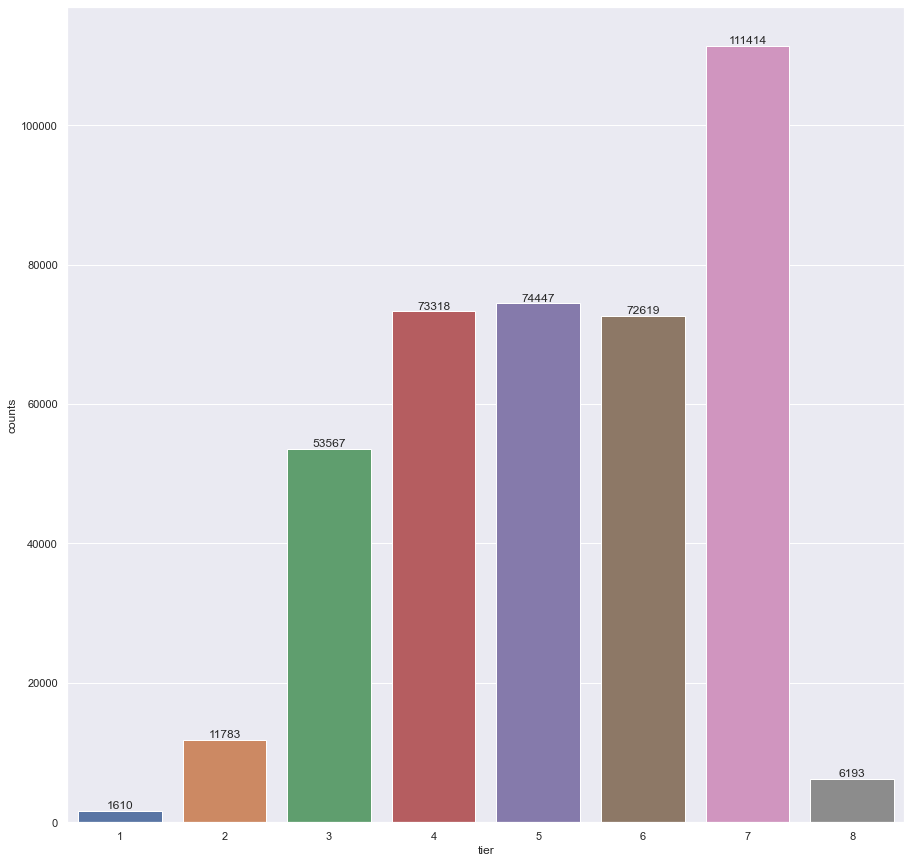

In [ ]:
calculate_plot_bar(data_merged, 'tier')

In [15]:
data_merged.to_csv('../data/preprocessed/dataset_merged.csv', index=None)

## Normal preprocess and merge

In [3]:
data = pd.read_csv('../data/preprocessed/dataset_selected.csv')

In [4]:
X_features = list(set(data.columns) - {'tier'})
percents = ['percent_boost_speed', 'percent_supersonic_speed', 'percent_low_air', 'percent_high_air',
            'percent_boost_0_25', 'percent_boost_25_50', 'percent_boost_50_75', 'percent_full_boost', 'percent_zero_boost',
            'percent_farthest_from_ball', 'percent_closest_to_ball', 'percent_most_forward', 'percent_most_back', 'percent_infront_ball',
            'percent_neutral_third', 'percent_offensive_third']
overfill = ['amount_overfill', 'amount_overfill_stolen', 'amount_stolen_small', 'amount_stolen_big']
remaining = list(set(X_features) - set(percents))
print(remaining)

['inflicted', 'avg_powerslide_duration', 'avg_distance_to_mates', 'time_boost_speed', 'amount_stolen_big', 'amount_collected_small', 'avg_distance_to_ball_possession', 'avg_distance_to_ball_no_possession', 'time_closest_to_ball', 'bpm', 'count_powerslide', 'goals_against', 'amount_overfill', 'shots', 'time_neutral_third', 'amount_used_while_supersonic', 'amount_collected_big', 'amount_stolen_small', 'time_infront_ball', 'shots_against', 'taken', 'shooting_percentage', 'amount_overfill_stolen', 'saves', 'score']


In [6]:
data_preprocessed = data.copy()

data_preprocessed[percents] /= 100

data_preprocessed[remaining] = RobustScaler().fit_transform(data_preprocessed[remaining])
data_preprocessed.describe()

,shots,shots_against,goals_against,saves,score,shooting_percentage,bpm,amount_collected_big,amount_stolen_big,amount_collected_small,...,percent_offensive_third,percent_neutral_third,percent_infront_ball,percent_most_back,percent_most_forward,percent_closest_to_ball,percent_farthest_from_ball,inflicted,taken,tier
count,404951.000000,404951.000000,404951.000000,404951.000000,404951.000000,404951.000000,404951.000000,404951.000000,404951.000000,404951.000000,...,404951.000000,404951.000000,404951.000000,404951.000000,404951.000000,404951.000000,404951.000000,404951.000000,404951.000000,404951.000000
mean,0.045483,0.075023,0.161039,-0.021931,0.082566,0.233522,-0.057821,-0.002323,0.127425,0.043820,...,0.203353,0.298146,0.282106,0.347117,0.337388,0.337060,0.346985,0.632669,0.626666,14.749960
std,0.789552,0.777282,0.809051,0.532476,0.752797,0.771711,0.708790,0.746011,0.793484,0.808688,...,0.061631,0.046655,0.060833,0.079459,0.067091,0.060549,0.072563,0.968222,0.879370,4.551041
min,-1.000000,-1.500000,-1.000000,-0.500000,-1.342995,-0.400000,-2.731092,-1.768688,-0.889401,-2.048980,...,0.000000,0.000000,0.000000,0.002219,0.000724,0.002178,0.002917,0.000000,0.000000,1.000000
25%,-0.500000,-0.500000,-0.500000,-0.500000,-0.463768,-0.400000,-0.546218,-0.519041,-0.437788,-0.485714,...,0.162986,0.269763,0.242892,0.295709,0.294324,0.299506,0.300579,0.000000,0.000000,11.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.201428,0.299025,0.280473,0.342576,0.334752,0.334670,0.342675,0.000000,0.000000,15.000000
75%,0.500000,0.500000,0.500000,0.500000,0.536232,0.600000,0.453782,0.480959,0.562212,0.514286,...,0.241639,0.328149,0.319533,0.392515,0.377178,0.371397,0.387638,1.000000,1.000000,19.000000
max,8.000000,8.250000,15.500000,5.000000,8.942029,9.600000,4.126050,7.428773,7.898618,11.322449,...,0.848047,0.821405,1.000000,1.147396,1.517857,1.267857,1.178572,43.000000,29.000000,22.000000


In [9]:
def merge(x):
    return (x + 2) // 3

data_merged = data_preprocessed.copy()

In [10]:
data_merged['tier'] = data_merged['tier'].apply(merge)

In [12]:
data_merged.describe()

,shots,shots_against,goals_against,saves,score,shooting_percentage,bpm,amount_collected_big,amount_stolen_big,amount_collected_small,...,percent_offensive_third,percent_neutral_third,percent_infront_ball,percent_most_back,percent_most_forward,percent_closest_to_ball,percent_farthest_from_ball,inflicted,taken,tier
count,404951.000000,404951.000000,404951.000000,404951.000000,404951.000000,404951.000000,404951.000000,404951.000000,404951.000000,404951.000000,...,404951.000000,404951.000000,404951.000000,404951.000000,404951.000000,404951.000000,404951.000000,404951.000000,404951.000000,404951.000000
mean,0.045483,0.075023,0.161039,-0.021931,0.082566,0.233522,-0.057821,-0.002323,0.127425,0.043820,...,0.203353,0.298146,0.282106,0.347117,0.337388,0.337060,0.346985,0.632669,0.626666,5.226657
std,0.789552,0.777282,0.809051,0.532476,0.752797,0.771711,0.708790,0.746011,0.793484,0.808688,...,0.061631,0.046655,0.060833,0.079459,0.067091,0.060549,0.072563,0.968222,0.879370,1.549768
min,-1.000000,-1.500000,-1.000000,-0.500000,-1.342995,-0.400000,-2.731092,-1.768688,-0.889401,-2.048980,...,0.000000,0.000000,0.000000,0.002219,0.000724,0.002178,0.002917,0.000000,0.000000,1.000000
25%,-0.500000,-0.500000,-0.500000,-0.500000,-0.463768,-0.400000,-0.546218,-0.519041,-0.437788,-0.485714,...,0.162986,0.269763,0.242892,0.295709,0.294324,0.299506,0.300579,0.000000,0.000000,4.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.201428,0.299025,0.280473,0.342576,0.334752,0.334670,0.342675,0.000000,0.000000,5.000000
75%,0.500000,0.500000,0.500000,0.500000,0.536232,0.600000,0.453782,0.480959,0.562212,0.514286,...,0.241639,0.328149,0.319533,0.392515,0.377178,0.371397,0.387638,1.000000,1.000000,7.000000
max,8.000000,8.250000,15.500000,5.000000,8.942029,9.600000,4.126050,7.428773,7.898618,11.322449,...,0.848047,0.821405,1.000000,1.147396,1.517857,1.267857,1.178572,43.000000,29.000000,8.000000


In [13]:
data_merged.to_csv('../data/preprocessed/dataset_normal_merged.csv', index=None)